In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import rootpath
sys.path.append(rootpath.detect())
from scipy.spatial import distance_matrix
from itertools import combinations_with_replacement, permutations, product
from igd_utilities import *

### suggested methods sphere
    - even angle distribution
    - normally distributed points projected to unit sphere
    - even spacing on simplex projected to unit sphere

highlight issues going to sphereoid

    - attainment sampling
    

### method 1
Points allocated according to method 1 described in:

@article{deserno2004generate,
  title={How to generate equidistributed points on the surface of a sphere},
  author={Deserno, Markus},
  journal={If Polymerforshung (Ed.)},
  pages={99},
  year={2004}
}

In [2]:
r = 1
a, b, c = 4, 1, 1

In [3]:
n_points = 1000
thetas = np.linspace(0, np.pi, int(n_points**(1/2))+1)[:-1]
gammas = np.linspace(0, 2*np.pi, int(n_points**(1/2))+1)[:-1]
angs = product(thetas, gammas)

lattice_x = np.zeros((int(n_points**(1/2))**2, 3))
for i, ang in enumerate(angs):
    xi = gen_polar_point(*ang, r)
    lattice_x[i] = xi

[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/latice_of_angles.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/latice_of_angles.pdf
saved to  figures/latice_of_angles.png
saved to  figures/latice_of_angles.pdf


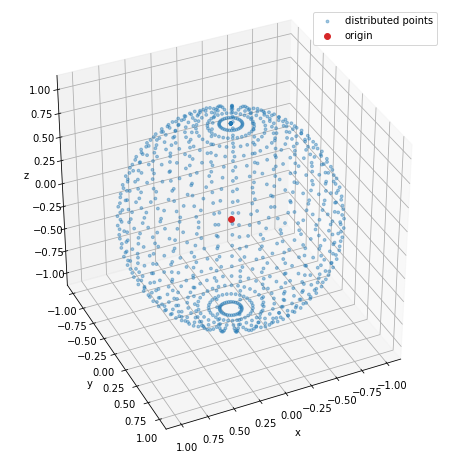

In [4]:
simple_3d_plot(lattice_x, "Latice of angles", save=True);

### Lattice of angles

Evenly distributed angles:
\begin{equation*}
0<\theta<2\pi \\ \gamma = \theta
\end{equation*}

#### Pros:
    - All points on the surface 
    - regular spacing
#### Cons:
    - Uneaven distribution of points; more concentrated at poles. 

In [5]:
r = 1       # radius
N = 1000    # n points

regular_x = np.zeros((N, 3))
N_count = 0
area = 4*np.pi*r**2/N
d = np.sqrt(area)

M_t = int(np.pi/d)
d_t = np.pi/M_t
d_g = area/d_t

for m in range(M_t-1):
    theta = np.pi*(m+0.5)/M_t
    M_g = int(2*np.pi*np.sin(theta)/d_g)
    for n in range(M_g-1):
        gamma = 2*np.pi*n/M_g
        regular_x[N_count] = gen_polar_point(theta, gamma, r)
        N_count +=1

[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/regularly_spaced_angles.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/regularly_spaced_angles.pdf
saved to  figures/regularly_spaced_angles.png
saved to  figures/regularly_spaced_angles.pdf


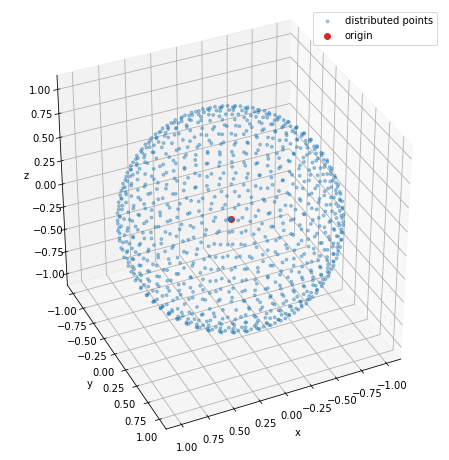

In [6]:
simple_3d_plot(regular_x, "regularly spaced angles", save=True);

### regular distribution of $\theta$  

distributed angles:
\begin{equation*}
0<d_{\theta}<2\pi \\
d_{\gamma} \simeq d_{\theta}\\
d_{\gamma}d_{\theta} = a
\end{equation*}

#### Pros:
    - All points on the surface 
    - Approximately eaven distribution of points. 
    - regular spacing
#### Cons:
    - does not scale up dimensionally
    - does not work on uneaven major-minor axes

### Projection from simplex

In [7]:
H = 20
sj = np.array([i/H for i in range(H+1)])
sj.shape

(21,)

In [8]:
combs= product(sj, repeat=3)
s = []
for comb in combs:
    sum_comb = np.sum(comb)
    if np.round_(np.sum(comb), decimals=9)==1.0:
        print("added: ",len(s), end="\r")
        s.append(comb)
s = np.array(s)
sn = normalise_length(s)*r
print(s.shape)
print(sn.shape)

(231, 3)230
(231, 3)


In [9]:
# reflections into full sphere
pows = product([-1,1], repeat=3)
S = []
for p in pows:
    p = np.array(p)
    S.append(p*s)
    
S = np.vstack(S)
Sn = normalise_length(S)*r
print(S.shape)
print(Sn.shape)

(1848, 3)
(1848, 3)


[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_points_quadrant.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_points_quadrant.pdf
saved to  figures/simplex_points_quadrant.png
saved to  figures/simplex_points_quadrant.pdf


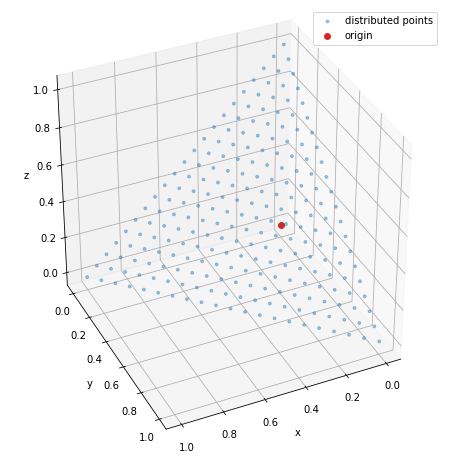

In [10]:
simple_3d_plot(s, title="simplex points quadrant", save=True);

[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_projection_quadrant.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_projection_quadrant.pdf
saved to  figures/simplex_projection_quadrant.png
saved to  figures/simplex_projection_quadrant.pdf


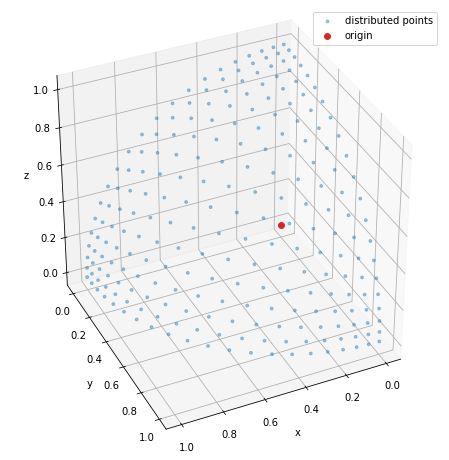

In [11]:
simple_3d_plot(sn, title="simplex projection quadrant", save=True);

[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_points_sphere.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_points_sphere.pdf
saved to  figures/simplex_points_sphere.png
saved to  figures/simplex_points_sphere.pdf


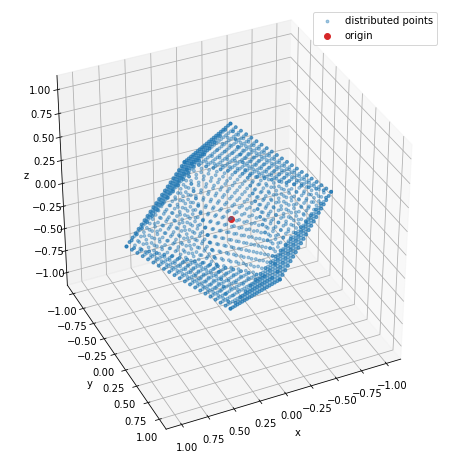

In [12]:
simple_3d_plot(S, title="simplex points sphere", save=True);

[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_projection_sphere.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/simplex_projection_sphere.pdf
saved to  figures/simplex_projection_sphere.png
saved to  figures/simplex_projection_sphere.pdf


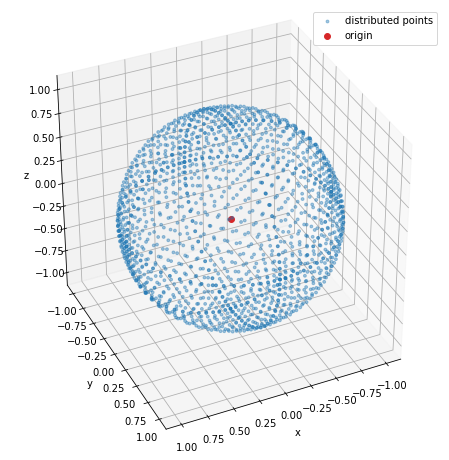

In [13]:
simple_3d_plot(Sn, title="simplex projection sphere", save=True);

### Multivariate Gaussian points projected to unit sphere

[1. 1. 1.]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projecttion_sphere.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projecttion_sphere.pdf
saved to  figures/multivariate_normal_distribution_projecttion_sphere.png
saved to  figures/multivariate_normal_distribution_projecttion_sphere.pdf


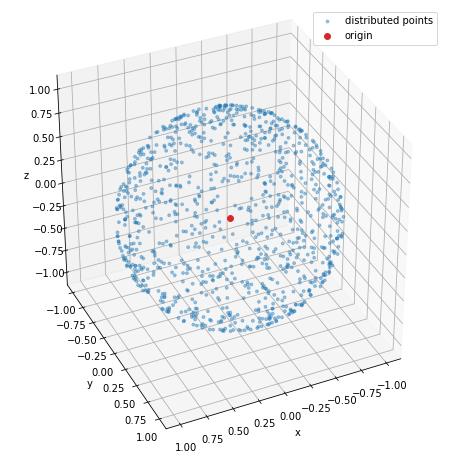

In [14]:
cloud_Gauss = np.random.multivariate_normal([0, 0, 0], np.diag([1**2, 1**2, 1**2]), size=n_points)
x_Gauss = normalise_to_axes(cloud_Gauss, [1, 1, 1])
simple_3d_plot(x_Gauss, "Multivariate normal distribution projecttion sphere", save=True);

[4 1 1]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projection_elipsoid.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projection_elipsoid.pdf
saved to  figures/multivariate_normal_distribution_projection_elipsoid.png
saved to  figures/multivariate_normal_distribution_projection_elipsoid.pdf


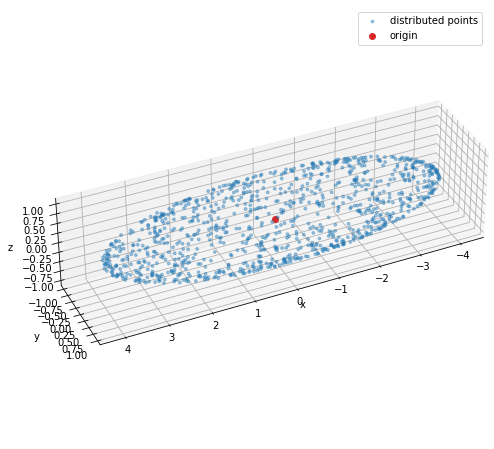

In [15]:
cloud_Gauss = np.random.multivariate_normal([0, 0, 0], np.diag([a**2, b**2, c**2]), size=n_points)
x_Gauss = normalise_to_axes(cloud_Gauss, [a, b, c])
simple_3d_plot(x_Gauss, axes=[a, b, c], title="Multivariate normal distribution projection elipsoid", save=True);

[4 1 1]
3d
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projection_elipsoid_abs.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projection_elipsoid_abs.pdf
saved to  figures/multivariate_normal_distribution_projection_elipsoid_abs.png
saved to  figures/multivariate_normal_distribution_projection_elipsoid_abs.pdf


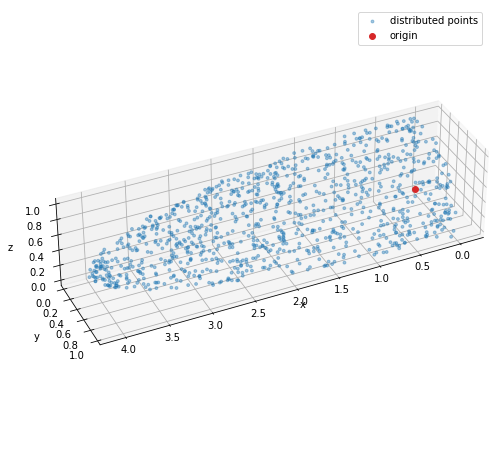

In [16]:
cloud_Gauss_q = np.random.multivariate_normal([0, 0, 0], np.diag([a**2, b**2, c**2]), size=int(n_points))
x_Gauss_q = abs(normalise_to_axes(cloud_Gauss_q, [a, b, c]))
fig = simple_3d_plot(x_Gauss_q, axes=[a, b, c], title="Multivariate normal distribution projection elipsoid abs", save=True);

saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projection_elipse.png
saved to  /home/finley/phd/papers/Pareto_sampling/figures/multivariate_normal_distribution_projection_elipse.pdf
saved to  figures/multivariate_normal_distribution_projection_elipse.png
saved to  figures/multivariate_normal_distribution_projection_elipse.pdf


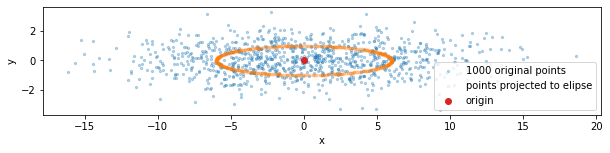

In [17]:
cloud_Gauss = np.random.multivariate_normal([0, 0], np.diag([6**2, 1**2]), size=int(n_points))
fig = simple_2d_plot(cloud_Gauss, axes=[6, 1], title="Multivariate normal distribution projection elipse", save=True);

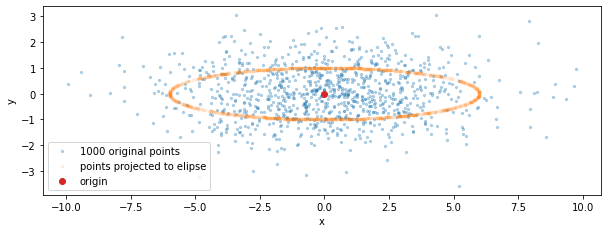

In [18]:
cloud_Gauss = np.random.multivariate_normal([0, 0], np.diag([3**2, 1**2]), size=int(n_points))
fig = simple_2d_plot(cloud_Gauss, axes=[6, 1], title="Multivariate normal distribution projection elipse unbalanced", save=False);

### Attainment sampling

In [19]:
attainment_x = attainment_sample(x_Gauss_q, n_points)

In [20]:
# %matplotlib qt

[1. 1. 1.]
3d


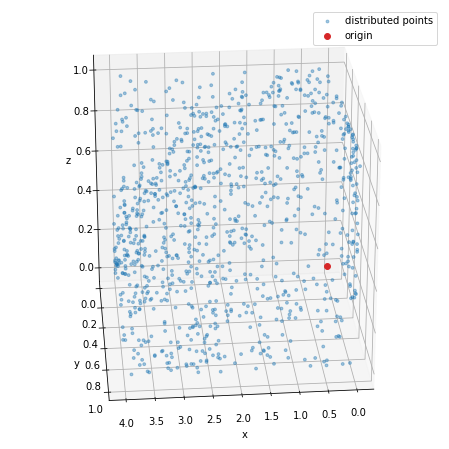

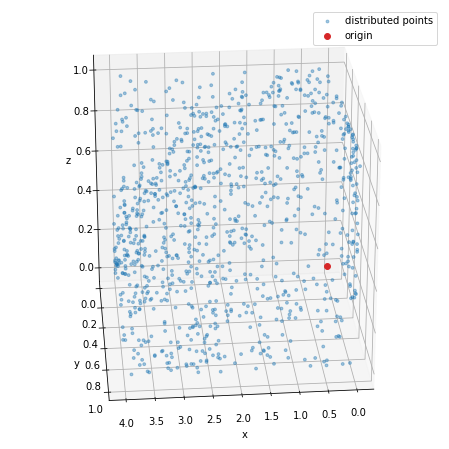

In [21]:
fig  = simple_3d_plot(attainment_x, title="title", save=False)
fig.axes[0].view_init(elev=25., azim=85)
fig

In [22]:
D = distance_matrix(attainment_x,x_Gauss_q).min(axis=1)
D2 = distance_matrix(attainment_x,x_Gauss_q).min(axis=0)
ans = [np.sum(D<i) for i in np.linspace(0, 0.1, 100)]
ans2 = [np.sum(D2<i) for i in np.linspace(0, 0.1, 100)]

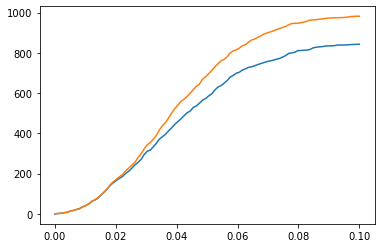

In [23]:
plt.plot(np.linspace(0, 0.1, 100), ans)
plt.plot(np.linspace(0, 0.1, 100), ans2)

In [24]:
p = D<0.09
d = np.invert(p)

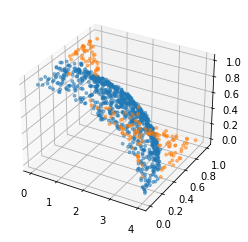

In [25]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(*attainment_x[p].T, c="C0", s=8, alpha=0.5)
ax.scatter(*attainment_x[d].T, c="C1", s=8, alpha=0.5)

[1. 1. 1.]
3d


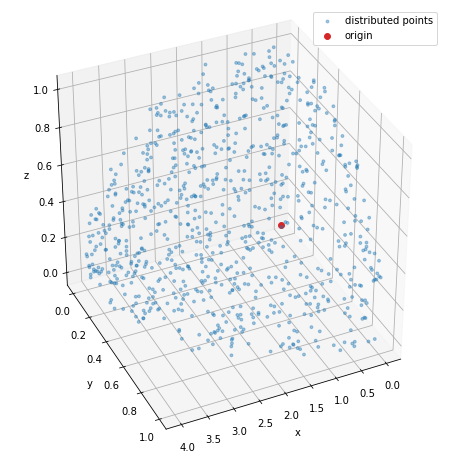

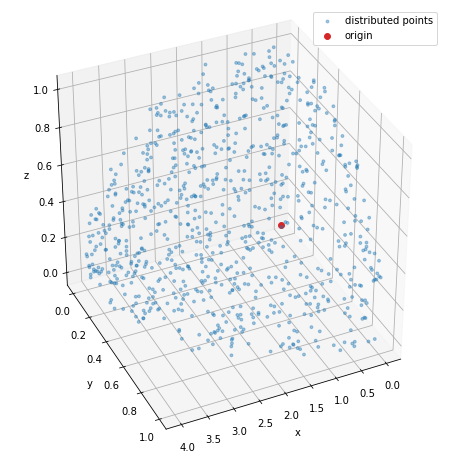

In [26]:
simple_3d_plot(attainment_x[p], title="title")

In [27]:
attainment_mags = np.sqrt(np.diag(np.dot(attainment_x/np.array([a, b, c]), (attainment_x/np.array([a, b, c])).T)))
attainment_mags.shape

(1000,)

In [28]:
aa = [np.sum(attainment_mags<i) for i in np.linspace(1, 1.5, 500)]

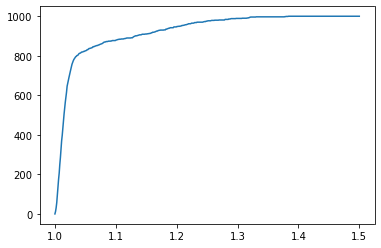

In [29]:
plt.plot(np.linspace(1, 1.5, 500), aa)

[1. 1. 1.]
3d


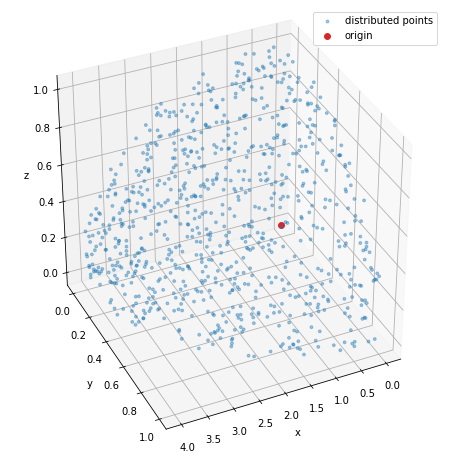

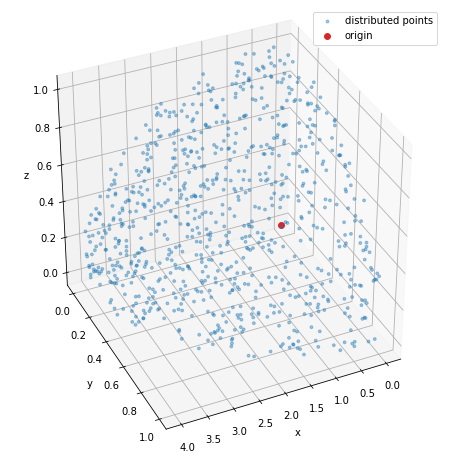

In [30]:
simple_3d_plot(attainment_x[attainment_mags<1.05], title="title")

[4 1 1]
3d


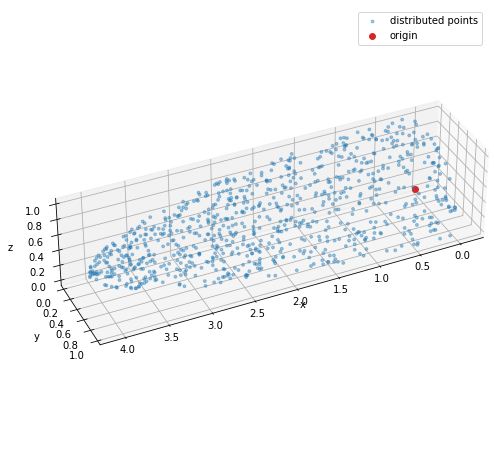

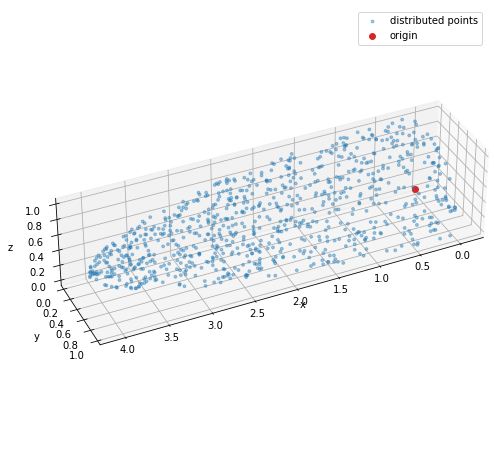

In [31]:
simple_3d_plot(normalise_to_axes(attainment_x[attainment_mags<1.05], [a, b, c]), axes=[a, b, c], title="title")


issues
    - setting threshold == trade off between edge bleeding/sampling close to comparison points 
    - 